# Results Explorer for lorenz models

includes plotting the sindy coefficients $\Xi$, loss metrics and trajectories for different initial conditions 

### Choose Model

In [212]:
#CHOOSE MODEL
model_path = "checkpoints/Nonlinear1/version_2"
#CHOOSE MODEL

In [198]:

#9 coeffs
#checkpoints/NonLinear2/version_2

#8 coeffs
#checkpoints/KathleenReplicas/version_9
#checkpoints/KathleenReplicas/version_20
#checkpoints/AltSpecs/version_4
#checkpoints/AltSpecs/version_6
#checkpoints/NonLinear1/version_0
#checkpoints/NonLinear1/version_16
#checkpoints/NonLinear2/version_12 #best
#checkpoints/NonLinear2/version_13
#checkpoints/NonLinear2/version_19

#7 coeffs
#checkpoints/NonLinear1/version_2 #bestes model
#checkpoints/NonLinear1/version_14
#checkpoints/NonLinear2/version_3
#checkpoints/NonLinear2/version_6
#checkpoints/NonLinear2/version_10
#checkpoints/NonLinear2/version_14

#6 coeffs
#checkpoints/NonLinear2/version_5 #deeecent
#checkpoints/KathleenReplicas/version_30

In [213]:
import sys
sys.path.append('../')
from trainer import SINDy_trainer, update_mask
import jax.numpy as jnp
import numpy as np
# 
#exmp input can be anythig if we are not passing any data through the model (autoencoder)
exmp_input = jnp.ones((1, 128))
trainer = SINDy_trainer.load_from_checkpoint(model_path, exmp_input)

xi_raw = trainer.state.params['sindy_coefficients']

#we don't store mask so we need to recreate it
mask = update_mask(xi_raw)

library_hparams = trainer.library_hparams

xi = xi_raw * mask
#making xi numpy array just to support assignment dont want to use .at[idx].set(val) method
xi = np.array(xi)
print(xi)

[[-0.         -6.7548575   0.        ]
 [-9.694053   -0.         -0.        ]
 [ 0.         -2.5755439  -0.        ]
 [10.733361    0.         -0.90056795]
 [ 0.         -0.         -0.        ]
 [ 0.         -0.         -9.804455  ]
 [ 0.          2.6709027   0.        ]
 [-0.         -0.         -0.        ]
 [ 0.         -0.         -0.        ]
 [-0.         -0.          0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [ 0.          0.          0.        ]
 [-0.          0.          0.        ]
 [-0.         -0.          0.        ]
 [-0.         -0.         -0.        ]
 [-0.          0.         -0.        ]
 [ 0.          0.         -0.        ]
 [-0.          0.         -0.        ]]


### Printing discovered equations

In [214]:
import matplotlib.pyplot as plt
from sindyLibrary import get_row_context

row_context = get_row_context(library_hparams)

lib_size, n_states = xi.shape

text = r"$$ \begin{align*}"

for i in range(n_states):
    first = True
    text += r"\dot{z}_" + f"{i+1}" + r" =& "
    for (x, y) in zip(xi, row_context):
        coeff = x[i]
        if coeff != 0:
            if coeff > 0 and not first:
                text += "+"
            text += f"{coeff:.2f} {y}"
            first = False
    text += r"\\"

text += r"\end{align*} $$"
from IPython.display import display, Latex
display(Latex(text))
    

<IPython.core.display.Latex object>

True Coeffs

$$
\begin{aligned}
\dot{z}_1 =& -10 z_1 + 10 z_2 \\
\dot{z}_2 =& 28 z_1 - z_2 - z_1 z_3 \\
\dot{z}_3 =& -\frac{8}{3}z_3 + z_1 z_2 \\
\end{aligned}
$$

model = "checkpoints/NonLinear1/version_2"
$$
\begin{align*}
\dot{z}_1 &= -9.69z_1 + 10.73z_2\\
\dot{z}_3 &= -6.751 - 2.58z_3 + 2.67z_1z_2\\
\dot{z}_2 &= -0.90z_2 + 9.80z_1z_3\\
\end{align*}
$$

### Plotting $\Xi$

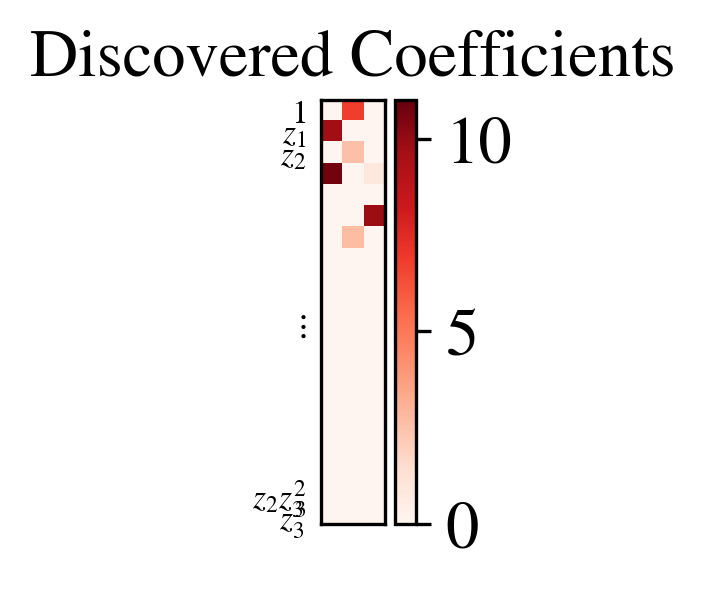

In [215]:
import matplotlib.pyplot as plt
from plot_utils.plot_xi import plot_sindy_coefficients


plt.style.use("../plot_utils/plot_settings.mplstyle")
plot_sindy_coefficients(xi, library_hparams = library_hparams, save_path="xi_plot.png")

### Plot difference between discovered coefficients ($\Xi$) and actual coefficients

The correct equations for the lorenz system are the following:

$$
\begin{aligned}
\dot{z}_1 =& \sigma (z_2 - z_1) \\



\dot{z}_2 =& z_1 (\rho - z_3) - z_2 \\



\dot{z}_3 =& z_1 z_2 - \beta z_3 \\

\end{aligned}
$$

with the standard paramater values $\sigma = 10$, $\beta = \frac{8}{3}$ and $\rho = 28$
That is:
$$
\begin{aligned}
\dot{z}_1 =& -10 z_1 + 10 z_2 \\
\dot{z}_2 =& 28 z_1 - z_2 - z_1 z_3 \\
\dot{z}_3 =& -\frac{8}{3}z_3 + z_1 z_2 \\
\end{aligned}
$$
We create an array with the theoretical values, in order to compare with the values from our model

In [216]:
#Currently this is assuming include_constant=True, include_sine=False, n_states=3, poly_order=3
# Should look into generalizing this if we want to use it for all models

true_xi = np.array([[0,0,0], [-10, 28,0], [10, -1, 0], [0, 0, -8/3], [0,0,0], [0,0,1], [0,-1,0]] + 13*[[0,0,0]])

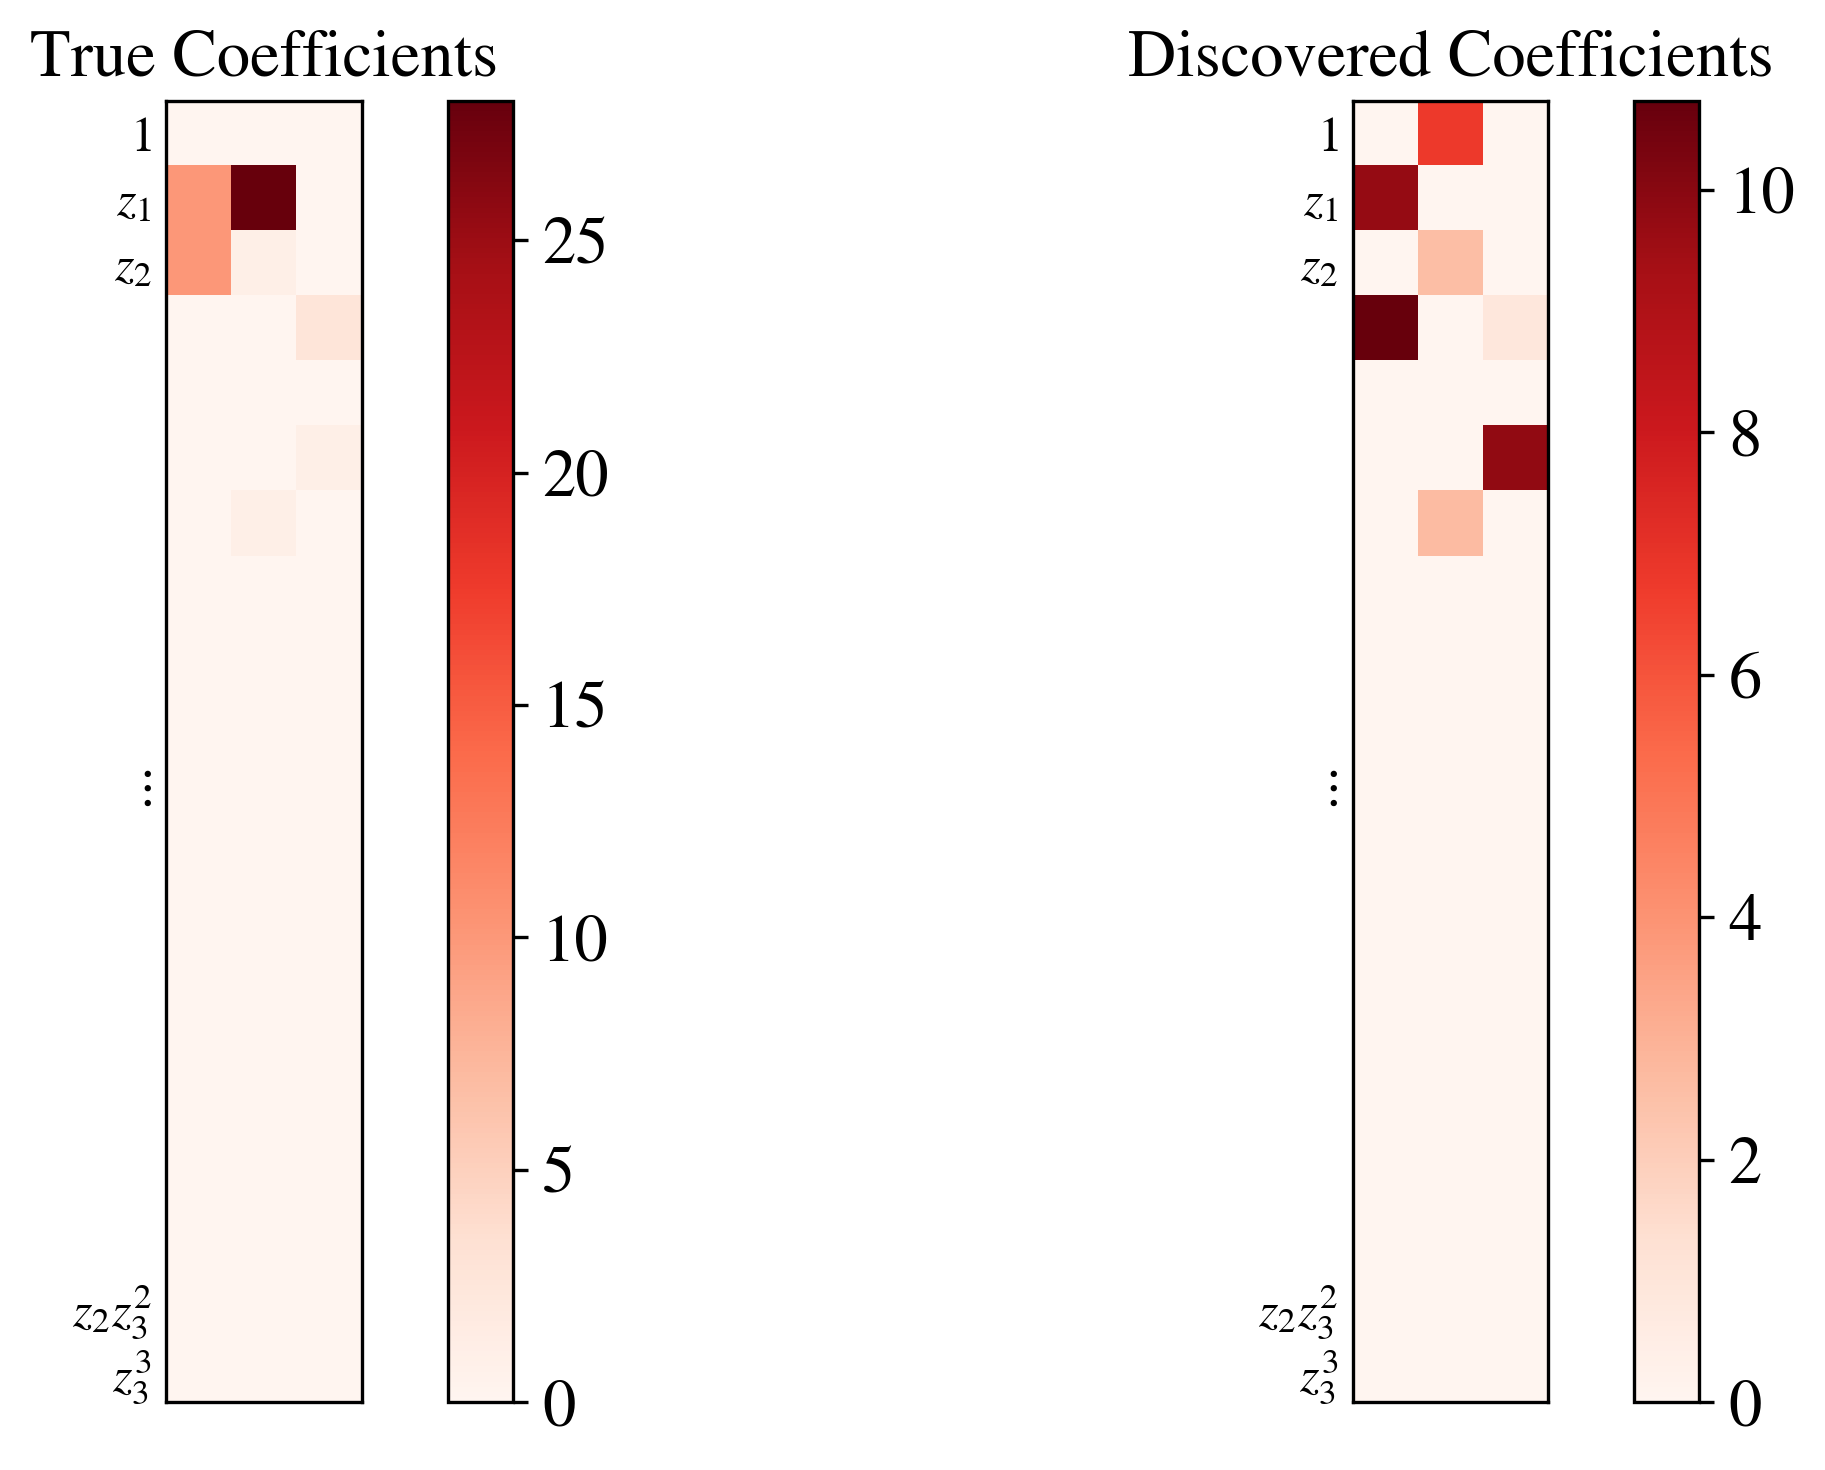

In [217]:
from plot_utils.plot_xi import compare_sindy_coefficients

plt.style.use("../plot_utils/plot_settings.mplstyle")
compare_sindy_coefficients(true_xi, xi, library_hparams = library_hparams, save_path="xi_plot.png")

### Plot losses

In [7]:
from plot_utils.metrics import RunMetrics
from plot_utils.plot_metrics import plot_metrics

metr = RunMetrics(model_path)

# Plot a single run
plot_metrics(metr, metric_names=["train/loss", "val/loss"], title="Loss Metrics")

ModuleNotFoundError: No module named 'metrics'